# Design for an Audience

Depending who we're making the graphs for, we have two kinds of data visualization:

- **Exploratory** data visualization: we create graphs for ourselves to better understand and explore data.
- **Explanatory** data visualization: we create graphs for others to inform, make a point, or tell a story.


## The Familiarity Principle
Let's say we're data journalists, and we're working on an article about the coronavirus. Our goal is to make readers more aware of how devastating this virus is — the assumption is that we're writing the article in December 2020, when the coronavirus was still fairly new.

Although unpleasant, we want to make readers more aware that people are dying because of this virus. To that end, we want to include a graph in the article that shows the top 20 countries by the number of deaths.

We've already collected the data and added it in the top20_deathtoll.csv file (the data was collected from [Worldometer](https://colab.research.google.com/drive/1mm3fFqriflmMDTQ39QroAot_QoPlOT0l#scrollTo=bt-WnfCy2ka0&line=6&uniqifier=1) on December 8, 2020).

First, we need to decide which type of graph to use. To make a good decision, we need to choose a graph that our audience can easily understand.

Ease of understanding often comes from familiarity. If people already know how to read a bar plot, they can immediately start reading the data on the graph. If they aren't familiar with a bar plot, they must first figure out how to read one.

The **familiarity principle** typically favors simple graphs over complicated, eye-catching graphs. As data scientists, we use visuals to communicate data correctly and efficiently. Our primary aim is not to impress the audience on artistic grounds.

To display the top 20 countries by number of deaths, a *horizontal bar plot* should work well enough — let's assume our audience is familiar with this kind of graph.



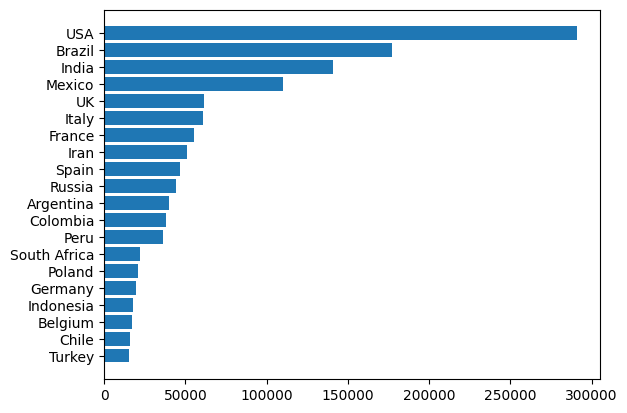

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

top20_deathtoll = pd.read_csv("top20_deathtoll.csv")
plt.barh(top20_deathtoll['Country_Other'],
         top20_deathtoll['Total_Deaths'])
plt.show()

## Matplotlib Interfaces

This graph is our starting point. We're going to learn how to design it for our audience — by the end of this lesson, we'll get to this version:

![image](file:///./image1.png)

To make the changes we want, we'll use matplotlib's object-oriented interface.

Matplotlib has two interfaces:

* A functional interface: we use functions to create and modify plots.
* An object-oriented (OO) interface: we use methods to create and modify plots.

We used the functional approach when we called the function `plt.barh()`. We also used this approach extensively in the Data Visualization Fundamentals course when we created and modified graphs using functions from the matplotlib.pyplot submodule: `plt.plot(), plt.scatter(), plt.title(), plt.xlim()`, etc.

The functional interface is simpler and easier to use. It comes in handy in the exploratory data visualization workflow, where we need to create graphs fast. But the OO interface offers more power and flexibility in graph editing.

On the next screen, we'll learn how to code a graph using the OO interface.

### The OO Interface

To create a graph using the OO interface, we use the plt.subplots() function, which generates an empty plot and returns a tuple of two objects:

```python
plt.subplots()
plt.show()
```

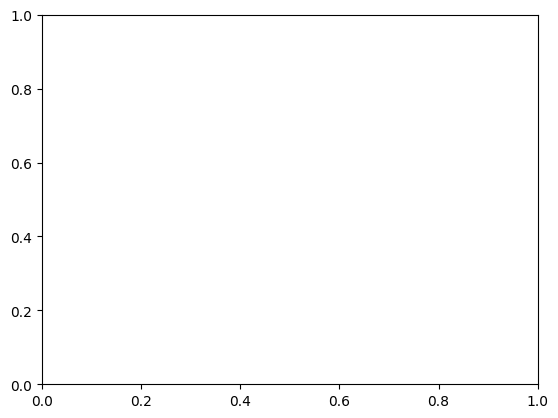

In [2]:
plt.subplots()
plt.show()

We assign the two objects inside the tuple to variables fig and ax:

```python
fig, ax = plt.subplots()
plt.show()
print(type(fig))
print(type(ax))
```

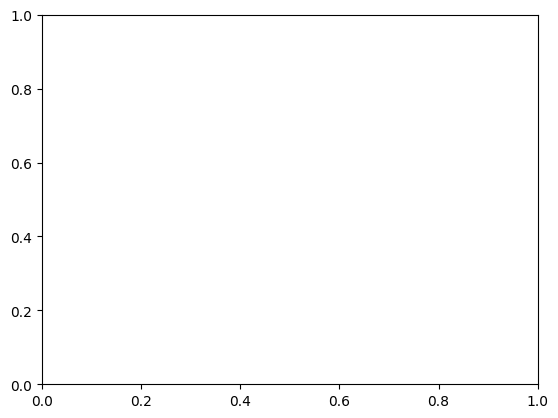

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._axes.Axes'>


In [3]:
fig, ax = plt.subplots()
plt.show()
print(type(fig))
print(type(ax))

The `matplotlib.figure.Figure` object acts as a canvas on which we can add one or more plots. The `matplotlib.axes._subplots`. AxesSubplot object is the actual plot. In short, we have two objects:

* The Figure (the canvas)
* The Axes (the plot; don't confuse with "axis," which is the x- and y-axis of a plot).

To create a bar plot, we use the `Axes.bar()` method and call plt.show():

```python
fig, ax = plt.subplots()
ax.bar(['A', 'B', 'C'],
       [2, 4, 16])
plt.show()
```


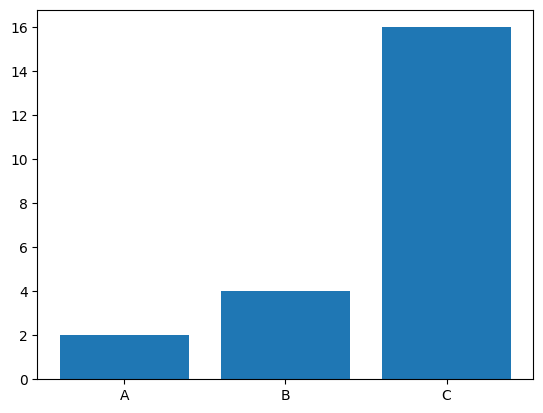

In [4]:
fig, ax = plt.subplots()
ax.bar(['A', 'B', 'C'],
       [2, 4, 16])
plt.show()

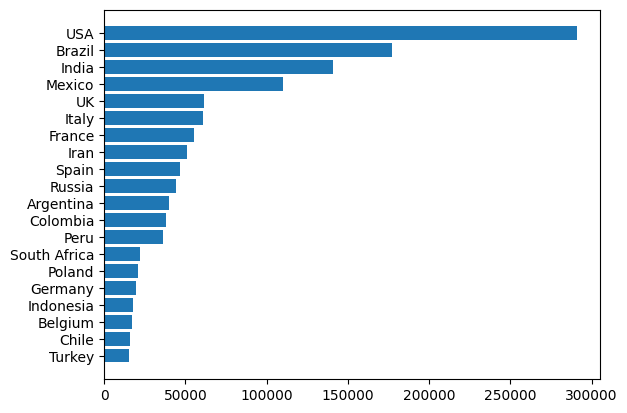

In [5]:
fig, ax = plt.subplots()
ax.barh(top20_deathtoll['Country_Other'],
         top20_deathtoll['Total_Deaths'])
plt.show()

### Mobile-Friendly Proportions
We know that a large part of our audience will read the article on a mobile device. This means our graph needs to have mobile-friendly proportions: small width, larger height. Our graph currently has a small height and a larger width.
To change the proportions, we can use the `figsize` parameter inside the `plt.subplots(figsize=(width, height))` function:

```python
fig, ax = plt.subplots(figsize=(3, 5))
ax.barh(['A', 'B', 'C'],
        [2, 4, 16])
plt.show()
```


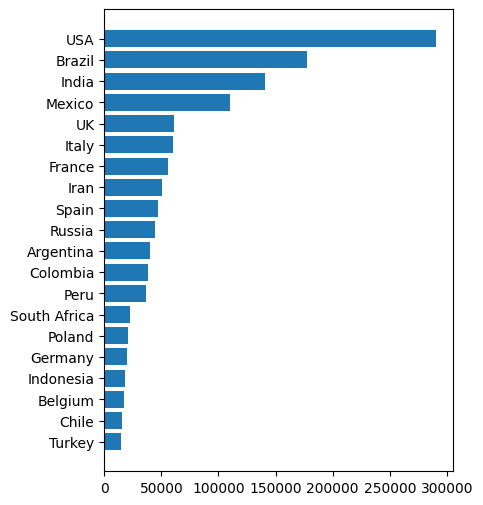

In [6]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
         top20_deathtoll['Total_Deaths'])
plt.show()

### Maximizing Data-Ink

When we design graphs (and anything in general), we need design principles to guide us. Design principles help us in two ways:

* They generate design options.
* They help us choose among those options.

One design principle we've already covered is **familiarity**.
>> For example, if we need to present a frequency distribution visually, familiarity gives us a few options: a histogram and a box plot (let's assume our audience is only familiar with these two). Our audience, however, is more familiar with histograms, so we choose a histogram for our presentation.

The next design principle we're going to learn has to do with maximizing data elements on a graph. Generally, a graph has three elements:

* Data elements: the numbers and the categories visually represented and the relationships between them.
* Structural elements: the axes, the ticks, the legend, the grid, etc.
* Decorations: extra colors, shapes, artistic drawings etc.

Maximizing the data elements ensures the audience's attention is on the data — not on structure or decorations. Below, we see how removing structural elements and decorations can maximize data elements (GIF source: Darkhorse Analytics):

Edward Tufte theorized the principle of maximizing data elements in his book *The Visual Display of Quantitative Information *(1983). From the total amount of ink used for printing a graph, some of the ink goes to show the data — that is the **data-ink**. As a sidenote, Tufte worked on his book in the 1980s, when most graphs were printed on paper using ink.

Tufte named the principle of maximizing data elements as **maximizing the data-ink ratio**. The data-ink ratio is the proportion of data-ink from the total ink:

$\textbf{Data-ink ratio} = \frac{\textbf{data-ink}}{\textbf{total ink used to print the graph}}$

A graph with many decorations and structural parts has a low data-ink ratio. A graph where data-ink prevails has a greater data-ink ratio. Below, we see two theoretical examples:

$\text{Data-ink ratio}=\frac{15}{100} = 0.15$

$\text{Data-ink ratio}=\frac{75}{100} = 0.75$

We should try to maximize the data-ink ratio within reason. Some structural elements are necessary; otherwise, the graph can become unreadable. Decorations are optional by definition, but they can help prove a point in some cases. We'll continue this discussion on the next screen, where we'll modify our graph using Tufte's principle: maximizing the data-ink ratio.


### Erasing Non-data Ink
To maximize data ink, we can do the following:

* Erase non-data ink
* Erase redundant data-ink

Let's see how we can maximize the data-ink ratio on our horizontal bar plot.
We begin by identifying the data-ink that we can't remove without losing information (this is the core of the graph):

* The bars
* The y-tick labels (the country names)
* The x-tick labels (the number of deaths)

There are two structural elements that constitute non-data ink — we can remove them without losing any important information:

* The axes
* The ticks

To remove the axes (also called spines), we can use the `Axes.spines[position].set_visible(bool)` method, where `position` is a string indicating the location of the axis: `'left', 'right', 'top', and 'bottom'`. For instance, this is how we remove the left and the bottom spines.

```python
fig, ax = plt.subplots()
ax.bar(['A', 'B', 'C'],
       [2, 4, 16])
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()
```

If we want to remove all the spines, the fastest way is to use a for loop:

```python
fig, ax = plt.subplots()
ax.bar(['A', 'B', 'C'],
       [2, 4, 16])

for location in ['left', 'right', 'bottom', 'top':
    ax.spines[location].set_visible(False)

plt.show()
```

To remove the ticks, we can use the `Axes.tick_params(bottom, top, left, right)` method. Below, we only need to remove the left and bottom ticks:

```python
fig, ax = plt.subplots()
ax.bar(['A', 'B', 'C'],
       [2, 4, 16])
​ax.tick_params(bottom=False, left=False)
plt.show()
```


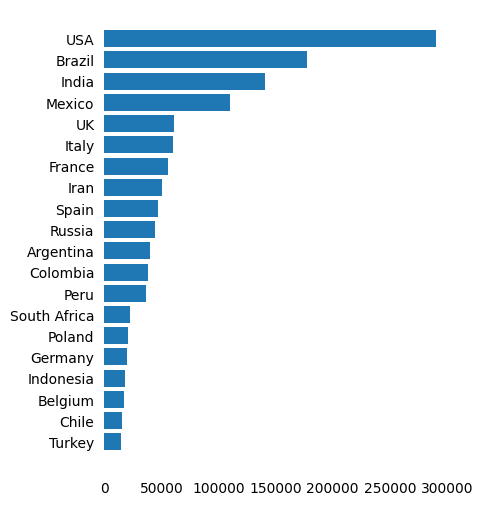

In [7]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
         top20_deathtoll['Total_Deaths'])

# remove spines
for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)

#remove tiks
ax.tick_params(bottom=False, left=False)
plt.show()

### Erasing Redundant Data-Ink

On the previous screen, we erased some non-data ink from our graph. Another way to remove more ink is to erase redundant data-ink. For our horizontal bar plot, we can make the bars less thick and remove some of the x-tick labels (we can leave only the labels 0, 150000, and 300000).

To make the bars less thick, we can use the `height` parameter inside the `Axes.barh()` method. The `height` parameter has a default value of `0.8`. Below, we exaggerate a little for the sake of the example and make the bars very thin, with `height=0.1`.

```python
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.1)
plt.show()
```

To remove some of the x-tick labels, we use the `Axes.set_xticks` method. Below, we only keep the labels `0, 100000, 200000, and 300000`.

```python
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'])
ax.set_xticks([0, 100000, 200000, 300000])
plt.show()
```


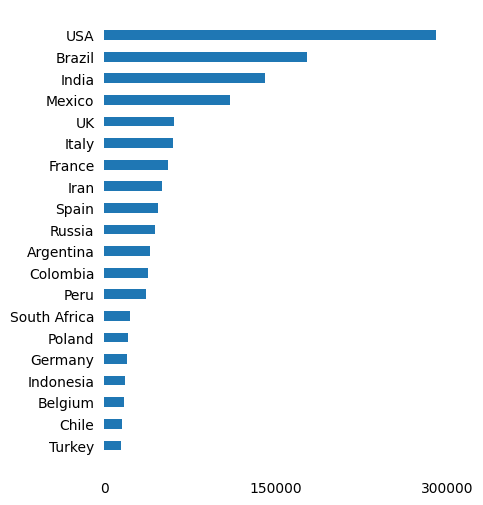

In [8]:
# Initial Code

fig, ax = plt.subplots(figsize=(4.5, 6))
# ax.barh(top20_deathtoll['Country_Other'],
#        top20_deathtoll['Total_Deaths'])

# remove spines
for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)

#remove tiks
ax.tick_params(bottom=False, left=False)

# Reduce the thickness of each bar to a value of 0.45
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.45)

# Keep only 0, 150000, and 300000 as x-tick labels.
ax.set_xticks([0, 150000, 300000])
plt.show()

### The Direction of Reading

So far in our lesson, we've applied two design principles:

* We chose a horizontal bar graph using the familiarity principle.
* We modified the graph using the maximizing data-ink ratio principle.

Another aspect that we need to consider is the audience's direction of reading. As they scroll down through our article, they will read (and look at) our graph from top to bottom. More specifically, people usually start from top left and follow a zigzag pattern until they reach bottom right.

One problem with our graph is that the tick labels are located at the bottom. People will immediately see the country names, the bars, but they may get confused about the quantities.

To address that, we're going to move the tick labels at the top of the graph using the `Axes.xaxis.tick_top()` method:

```python
# Assume the rest of the code is written
ax.xaxis.tick_top()
```

Right now, the first thing people will probably see are the x-tick labels. We want readers to focus on the data, so we'll do two things:

* We'll color the x-tick labels in grey so they don't stand out visually so much.
* We'll color the bars in a shade of red.

To color the x-tick labels, we use the same `Axes.tick_params()` method. However, we need to call it one more time because we only want to modify the ticks of the x-axis.

```python
# Assume the rest of the code is written
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
```

To change the colors of the bar, we use the `color` parameter in the `Axes.barh(color)` method. This parameter accepts HEX color codes, and we use `#af0b1e` to get a shade of red. (One place where you can get HEX color codes is [here](https://www.color-hex.com/).)

```python
# Assume the rest of the code is written
ax.barh(total_deaths_20['Country_Other'],
        total_deaths_20['Total_Deaths'],
        height=0.45, color='#af0b1e')
```


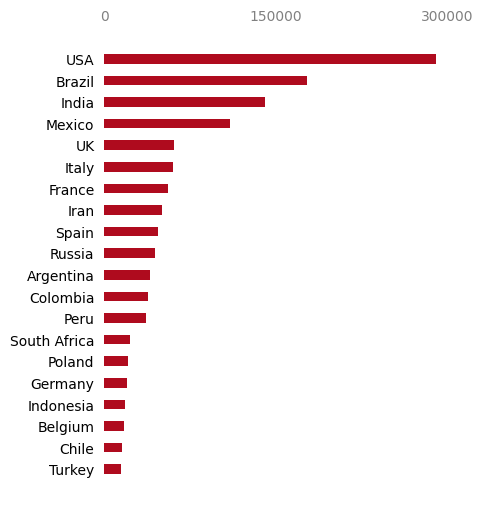

In [9]:
# Initial Code

fig, ax = plt.subplots(figsize=(4.5, 6))
# ax.barh(top20_deathtoll['Country_Other'],
#         top20_deathtoll['Total_Deaths'],
#         height=0.45)

for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)

# ax.tick_params(bottom=False, left=False)
ax.set_xticks([0, 150000, 300000])

# Color the horizontal bar plot using the HEX color code #af0b1e.
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.45, color='#af0b1e')

# Move the x-tick labels on top and make sure no ticks are visible.
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)

# Color the x-tick labels in grey.
ax.tick_params(axis='x', colors='grey')
plt.show()

### Title and Subtitle

If someone looks at our graph, they won't be able to tell what the quantity means. They see the USA has almost 300,000 of something, but what is that something?

Instead of adding an x-axis label, we'll use the title and subtitle area to give the readers the necessary details. More specifically, we will do the following:

* Add a subtitle that explains what the quantity describes and when the data was collected.
* Use the title to show readers more data — we'll report that the death toll worldwide has surpassed 1.5M (data source: [Worldometer](https://colab.research.google.com/drive/1mm3fFqriflmMDTQ39QroAot_QoPlOT0l#scrollTo=bt-WnfCy2ka0&line=6&uniqifier=1)).

Generally, the title must be data ink. If we need to give structural explanations in text, we can use the subtitle. That's because the title is always so noticeable, and we need to leverage that to show more data (and also maximize the data-ink ratio).

To add a title and a subtitle, we're going to use the Axes.text() method. This method expects at least three arguments:

* `x` and `y`: the coordinates that give the position of the text.
* `s`: the text.

Below, we add a title and subtitle to a bar plot:

```python
fig, ax = plt.subplots()
ax.bar(['A', 'B', 'C'],
       [2, 4, 16])
ax.text(x=0.5, y=18, s='Title example')
ax.text(x=0.5, y=17, s='Subtitle example')
plt.show()
```

The `Axes.text()` method has a `size` parameter we can use to control the text size. Also, it has a `weight` parameter that enables us to bold the text.

```python
fig, ax = plt.subplots()
ax.bar(['A', 'B', 'C'],
       [2, 4, 16])
ax.text(x=0.5, y=18, s='Title example',
        size=15, weight='bold')
ax.text(x=0.5, y=17, s='Subtitle example',
        size=12)
plt.show()
```



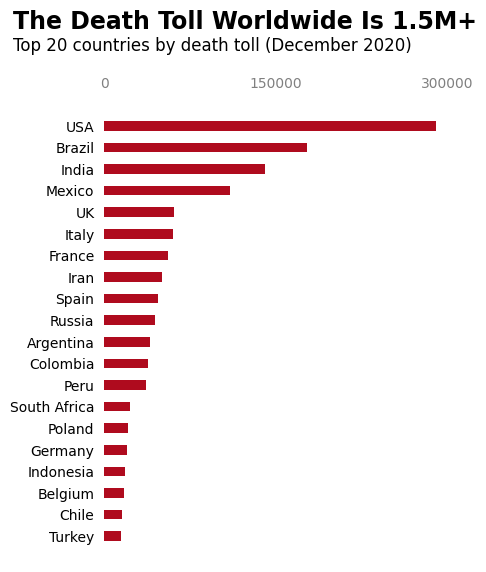

In [10]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.45, color='#af0b1e')
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.set_xticks([0, 150000, 300000])
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')

# Add the title The Death Toll Worldwide Is 1.5M+.
# The title should have the following properties:

# The x-coordinate is -80000
# The y-coordinate is 23.5
# It is in bold text
# It has a font size of 17

ax.text(x=-80000, y=23.5, s='The Death Toll Worldwide Is 1.5M+',
        size=17, weight='bold')

# Add the subtitle Top 20 countries by death toll (December 2020). The subtitle should have the following properties:

# The x-coordinate is -80000
# The y-coordinate is 22.5
# It has a font size of 12
ax.text(x=-80000, y=22.5, s='Top 20 countries by death toll (December 2020)', size=12)
plt.show()

### Final Touches

We're going to give it some final touches.
First, we'll make the y-tick labels easier to read. We'll add a comma to both 150000 and 300000 to make them more readable — so people don't have to struggle to tell whether it's a 30,000 or a 300,000, for instance.

To make this change, we use the `Axes.set_xticklabels()` method.

```python
# Assume the rest of the code is written
ax.set_xticklabels(['0', '150,000', '300,000'])
```

Next, we're going to left-align the y-tick labels (the country names) by applying a `for loop` over the `country names` using python's `zip` function. Thereafter, we will leverage the flexibility of matplotlib's `Axes.text()` method. First, however, we're going to remove the current labels using the `Axes.set_yticklabels()` method.

```python
# Assume the rest of the code is written
ax.set_yticklabels([]) # an empty list removes the labels
country_names = top20_deathtoll['Country_Other']
for i, country in zip(range(20), country_names):
    ax.text(x=-80000, y=i-0.15, s=country)
```

Readers who explore the graph will try to determine the approximate death toll for each country. To help them, we're going to draw a vertical line below the `150,000` value. To do that, we use the `Axes.axvline(x)` method, where `x` is the `x-coordinate` where the line begins:

```python
# Assume the rest of the code is written
ax.axvline(x=150000)
```

The color of the vertical line is too bright and stands out more than we want. Moreover, the line spans too far vertically and isn't on the same line with the Turkey label. To fix these problems, we're going to use the following:

* The ymin parameter to make it shorter — where 0 is the bottom of the plot, and 1 is the top of the plot.
* The c parameter to change the color to 'grey'.
* The alpha parameter to add transparency to the line.

```python
# Assume the rest of the code is written
ax.axvline(x=150000, ymin=0.045, c='grey', alpha=0.5)
```



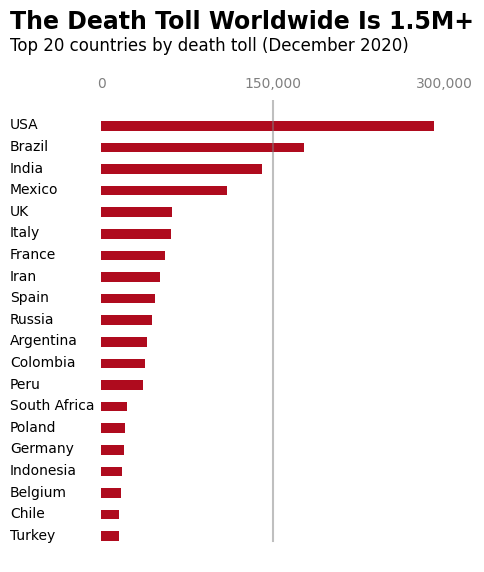

In [11]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.45, color='#af0b1e')
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.set_xticks([0, 150000, 300000])
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
ax.text(x=-80000, y=23.5,
        s='The Death Toll Worldwide Is 1.5M+',
        weight='bold', size=17)
ax.text(x=-80000, y=22.5,
        s='Top 20 countries by death toll (December 2020)',
        size=12)

# Change the x-tick labels to 0, 150,000, and 300,000
ax.set_xticklabels(['0', '150,000', '300,000'])

# Left-align all y-tick labels. Each label must have the coordinates x=-80000 and y=i-0.15, where i is an integer in the range(0, 20).
ax.set_yticklabels([]) # an empty list removes the labels
country_names = top20_deathtoll['Country_Other']
for i, country in zip(range(20), country_names):
    ax.text(x=-80000, y=i-0.15, s=country)

# Add a vertical line with the following properties:
# Its x-coordinate is 150000
# Its ymin is 0.045
# It has a gray color
# It has a transparency of 0.5
ax.axvline(x=150000, ymin=0.045, c='grey', alpha=0.5)

plt.show()